### 🔙 Volver al [Índice](./Indice_Tablas_Frecuencias.ipynb)

### 1: Datos cuantitativos discretos (500 datos aleatorios)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar 500 datos aleatorios enteros entre 1 y 20 (puedes ajustar el rango)
datos = np.random.randint(1, 21, size=500)


### 2: Tabla de frecuencias

In [2]:
tabla = pd.Series(datos).value_counts().sort_index()
frecuencia_absoluta = tabla
frecuencia_relativa = tabla / len(datos)
frecuencia_acumulada = frecuencia_absoluta.cumsum()

df_frecuencias = pd.DataFrame({
    'Valor': tabla.index,
    'Frecuencia absoluta': frecuencia_absoluta.values,
    'Frecuencia relativa': frecuencia_relativa.values,
    'Frecuencia acumulada': frecuencia_acumulada.values
})

df_frecuencias


,Valor,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada
0,1,34,0.068,34
1,2,14,0.028,48
2,3,21,0.042,69
3,4,21,0.042,90
4,5,19,0.038,109
5,6,27,0.054,136
6,7,22,0.044,158
7,8,27,0.054,185
8,9,27,0.054,212
9,10,21,0.042,233


### 3: Gráficos
#### 1. Histograma (frecuencia absoluta)

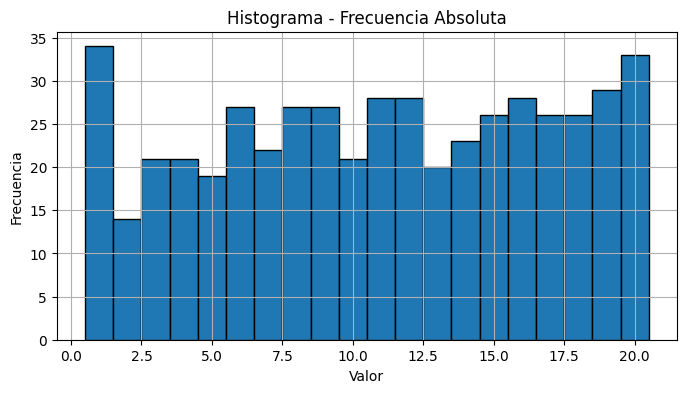

In [3]:
plt.figure(figsize=(8, 4))
plt.hist(datos, bins=range(1, 22), edgecolor='black', align='left')
plt.title('Histograma - Frecuencia Absoluta')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


#### 2. Diagrama de barras horizontales (frecuencia absoluta)

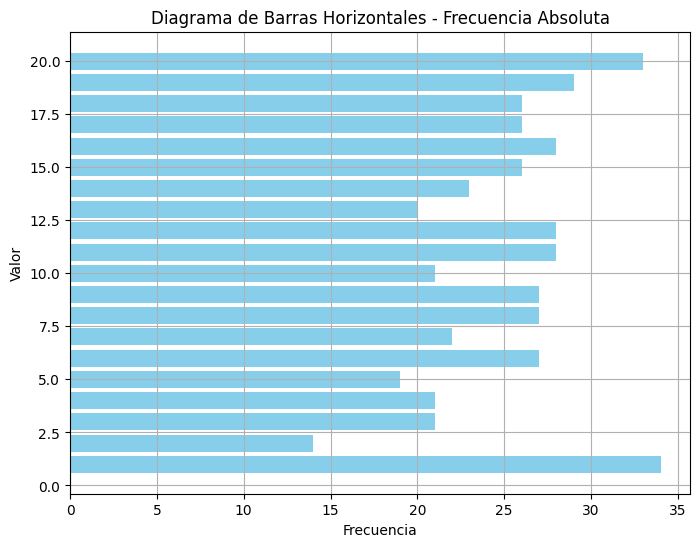

In [4]:
plt.figure(figsize=(8, 6))
plt.barh(df_frecuencias['Valor'], df_frecuencias['Frecuencia absoluta'], color='skyblue')
plt.title('Diagrama de Barras Horizontales - Frecuencia Absoluta')
plt.xlabel('Frecuencia')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


#### 3. Polígono de frecuencia (frecuencia relativa)

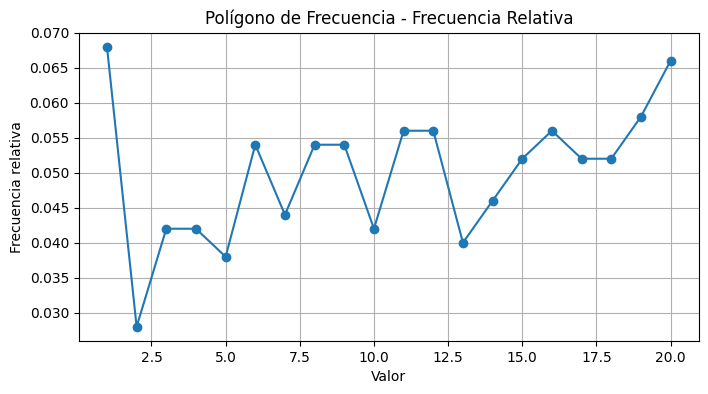

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(df_frecuencias['Valor'], df_frecuencias['Frecuencia relativa'], marker='o', linestyle='-')
plt.title('Polígono de Frecuencia - Frecuencia Relativa')
plt.xlabel('Valor')
plt.ylabel('Frecuencia relativa')
plt.grid(True)
plt.show()

 #### 4. Diagrama de pastel (frecuencia relativa)

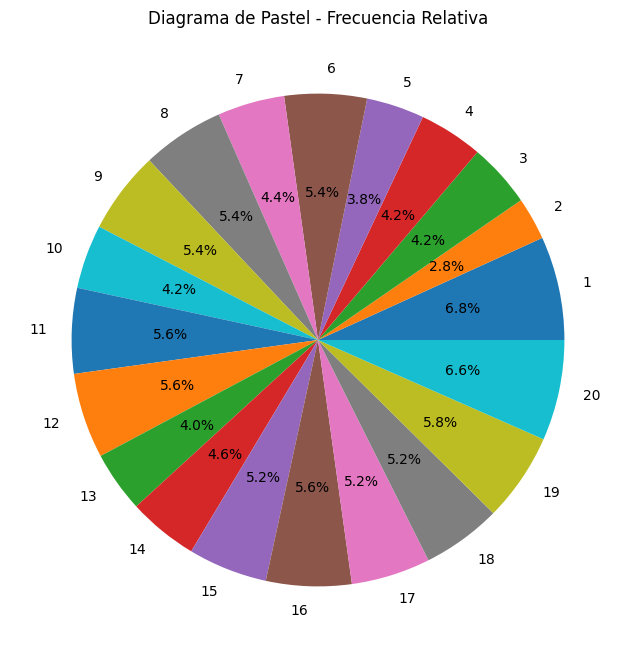

In [6]:
plt.figure(figsize=(8, 8))
plt.pie(df_frecuencias['Frecuencia relativa'], labels=df_frecuencias['Valor'], autopct='%1.1f%%')
plt.title('Diagrama de Pastel - Frecuencia Relativa')
plt.show()


#### 5. Ojiva (frecuencia acumulada)

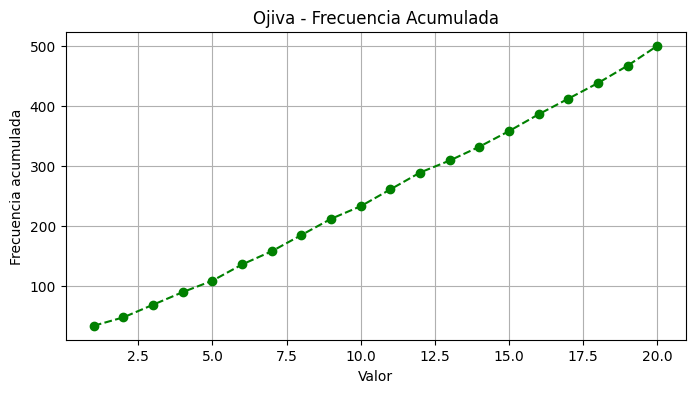

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(df_frecuencias['Valor'], df_frecuencias['Frecuencia acumulada'], marker='o', linestyle='--', color='green')
plt.title('Ojiva - Frecuencia Acumulada')
plt.xlabel('Valor')
plt.ylabel('Frecuencia acumulada')
plt.grid(True)
plt.show()
